### This notebook is a basic example of how to use the GLODAP Section Gridder.
#### Load in plots package, DIVA wrapper functions, set directory locations and filenames

This example works under the assumption that you have git cloned the GLODAP_Section_Gridder
toolbox, and that therefore you are in its top level folder. If this is not the case, set it 
manually in the Julia block below.

In [1]:
toolboxDir = "/Users/ct6g18/Julia/GLODAP_Section_Gridder/"
cd(toolboxDir)
using GLODAP_Section_Gridder

We are now going to read the defaults out. These can be found in `$toolboxDir/defaults.toml`,
if you wish to change them. However, all following function calls in this example 
will explicitly pass arguments with defaults.

In [2]:
GLODAP_Section_Gridder.readDefaults()

Dict{String, Any} with 10 entries:
  "GOSHIP_DIR"          => "/Users/ct6g18/MATLAB/GO_SHIP"
  "GLODAP_FILENAME"     => "GLODAPv2.2021_Merged_Master_File.mat"
  "USERNAME"            => "Charles Turner"
  "EXCEPTIONS_FILENAME" => "ExpocodeList.csv"
  "OUTPUTS_DIR"         => "/Users/ct6g18/Julia/GriddedSections"
  "HORZLEN_EXCEPTIONS"  => "horzLenExceptions.csv"
  "MASK_MATFILE"        => "data/GOSHIP_MaskStruct.mat"
  "VARIABLE_EXCEPTIONS" => "variableExceptions.csv"
  "EXCEPTIONS_DIR"      => "data/Exceptions"
  "GLODAP_DIR"          => "/Users/ct6g18/MATLAB/GLODAP"

As you can see, these defaults are set to sensible defaults on my (CT) machine.
As a user, you may change these by editing  `$toolboxDir/defaults.toml`, or by 
manually setting them in function calls. For now, we will simply set them by hand:
as a user, you will need to edit the following code block.

Note that unless an absolute path is set, you should not need to edit any defaults
in the current implementation.

`GOSHIP_DIR` refers to the directory where you have git cloned the GO-SHIP Easy 
Ocean toolbox. `GLODAP_DIR` refers to the location where you keep the GLODAP 
Merged Master File. 

In [4]:
GOSHIP_DIR = "/Users/ct6g18/MATLAB/GO_SHIP"
GLODAP_DIR = "/Users/ct6g18/MATLAB/GLODAP"
GLODAP_FILENAME = "GLODAPv2.2021_Merged_Master_File.mat"
MASK_MATFILE = "data/GOSHIP_MaskStruct.mat"

"data/GOSHIP_MaskStruct.mat"

At this point, check that the files we need for the toolbox have been correctly 
specified.


GLODAP File:

In [5]:
@assert(isfile(joinpath(GLODAP_DIR,GLODAP_FILENAME))) 

GO-SHIP Files:  (tested using a random file within GO-SHIP Easy Ocean)

In [6]:
@assert(isfile(joinpath(GOSHIP_DIR,"go_ship_clean_ctd","gridded","atlantic","A02","a02.mat")))

Structure containing masks:

In [7]:
@assert(isfile(joinpath(toolboxDir,MASK_MATFILE)))

If all assertions have passed, we should be able to use the toolbox.

Grid cruise and display gridded output data in a single line of code by specifying section, cruise expocode, horizontal coordinate and variable of interest

┌ Info: Vert. correlation length at z=0.0: 206.188864
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=100.0: 188.594112
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=200.0: 156.298912
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Warning: Too few data. Will use guesses (np = 9, RLz = 507.464, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Vert. correlation length at z=300.0: 507.464
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=400.0: 268.7280192
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=500.0: 388.0513728000001
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1184
┌ Info: Vert. correlation length at z=600.0: 431.853216
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/

┌ Info: Data points at z=600.0: 323, horz. correlation length: 1.4283721514524932 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=700.0: 276, horz. correlation length: 2.1522809846778763 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=800.0: 252, horz. correlation length: 1.8793866743358598 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Warning: Too few data. Will use guesses (np = 4, RLz = 1.4772141097356881, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Data points at z=900.0: 252, horz. correlation length: 1.4772141097356881 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=1000.0: 219, horz. correlation length: 2.365273576947728 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at

┌ Info: Data points at z=6000.0: 14, horz. correlation length: 22.391428582821412 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Warning: Too few data. Will use guesses (np = 4, RLz = 27.782999999999998, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Data points at z=6100.0: 10, horz. correlation length: 27.782999999999998 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Warning: Too few data. Will use guesses (np = 0, RLz = 31.978749999999998, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Data points at z=6200.0: 4, horz. correlation length: 31.978749999999998 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Warning: Too few data. Will use guesses (np = 0, RLz = 54.81555555555554, )
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:900
┌ Info: Data points at z=6300.0: 3, horz. correlation length

┌ Info: Data points at z=5100.0: 147, horz. correlation length: 8.353040464958216 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5200.0: 138, horz. correlation length: 9.182681224397335 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5300.0: 119, horz. correlation length: 9.775587535318838 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5400.0: 106, horz. correlation length: 11.04475192091836 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5500.0: 97, horz. correlation length: 12.156249664883077 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ Info: Data points at z=5600.0: 89, horz. correlation length: 11.074626112111238 (preliminary)
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1085
┌ In

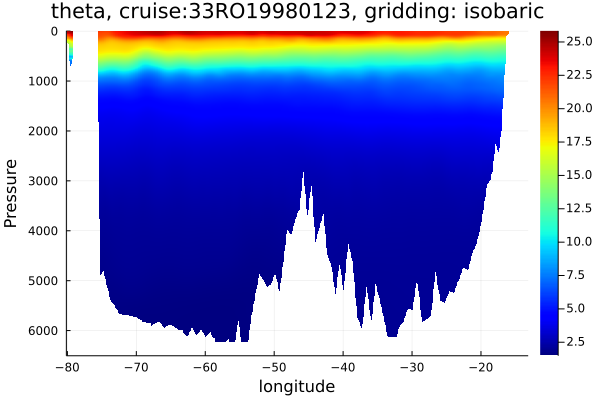

GLODAP_expocode is a string
Horizontal scale factor: 0.09727455520082248
Vertical scale factor: 0.10000000000000013
Trying to fit horizontal correlation length: attempt 1
Trying to fit horizontal correlation length: attempt 2


┌ Info: Smoothed horz. correlation length at z=5200.0: 9.221878060619064
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5300.0: 9.98834587219437
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5400.0: 10.734284086053842
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5500.0: 11.00247092551467
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5600.0: 10.561182726292005
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5700.0: 9.645346968468731
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:1113
┌ Info: Smoothed horz. correlation length at z=5800.0: 8.557752445873119
└ @ DIVAnd /Users/ct6g18/.julia/packages/DIVAnd/MV3j9/src/fit.jl:111

651×670 Matrix{Float64}:
 NaN  NaN       NaN       NaN       …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   24.9363   25.0117   25.1555     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   24.8943   24.9616   25.0875     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   24.7305   24.7924   24.9095     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   24.4479   24.5082   24.6191     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   23.9572   24.0387   24.1964  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   23.6059   23.6822   23.8241     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   23.0515   23.1495   23.3349     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   22.5066   22.6219   22.84       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN   22.1316   22.2559   22.4871     NaN  NaN  NaN  NaN  NaN  NaN  NaN
   ⋮                                ⋱              ⋮                 
 NaN  NaN       NaN       NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN       NaN       NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN       NaN       NaN

In [8]:
temp  = GLODAP_Section_Gridder.gridCruisePipeline(GLODAP_DIR = GLODAP_DIR,GOSHIP_DIR = GOSHIP_DIR
                           ,gridding="isobaric",MASK_MATFILE = MASK_MATFILE, sectionName = "A05"
                           ,horzCoordinate="longitude",expocode="33RO19980123",variableName="G2theta"
                           ,plotResults=true,epsilonVal=0.1)

In [ ]:
Oxygen = gridCruisePipeline(GLODAP_DIR = GLODAP_DIR,GOSHIP_DIR = GOSHIP_DIR
                           ,gridding="isopycnic",MASK_MATFILE = MASK_MATFILE, sectionName = "A05"
                           ,horzCoordinate="longitude",expocode="33RO19980123",variableName="G2oxygen"
                           ,plotResults=true,epsilonVal=0.1)

Grid all data from all repeats of a section and save outputs in a single line of code by specifying section name, variable and horizontal coordinate

In [ ]:
DIC = gridSectionPipeline(GLODAP_DIR = GLODAP_DIR,GOSHIP_DIR = GOSHIP_DIR
                         ,sectionName="A10",horzCoordinate="longitude"
                         ,gridding="isobaric",variableName="G2tco2",epsilonVal=0.2)

In [ ]:
heatmap(DIC[:,:,1], yflip=true, c=:jet1)

Grid a section of CFC-11 from P06 in 2016. First, lets list P06 cruises.

In [ ]:
GLODAP_Section_Gridder.listSectionExpocodes("P06")

So we want `expocode = 320620170820`

Now we need to work out what the variable name is.

In [ ]:
GLODAP_Section_Gridder.listAvailableGLODAPVariables(GLODAP_DIR,GLODAP_FILENAME)

So we want `variableName = G2cfc11`. Now we can call `gridCruisePipeline()` to get
the data out.

In [ ]:
CFC11  = GLODAP_Section_Gridder.gridCruisePipeline(GLODAP_DIR = GLODAP_DIR,GOSHIP_DIR = GOSHIP_DIR
                           ,gridding="isobaric",MASK_MATFILE = MASK_MATFILE,sectionName = "P06"
                           ,horzCoordinate="longitude",expocode="320620170820",variableName="G2cfc11"
                           ,plotResults=true,epsilonVal=0.1,autoTruncateMask=true)